## Pre-Processing and Modeling.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# kNN import
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Spectral Clustering
from sklearn.cluster import SpectralClustering

import warnings
warnings.filterwarnings('ignore')

## Reading in the cleaned dataset.

In [2]:
spot = pd.read_csv('../Data/clean/final.csv')

In [3]:
spot.head()

,song title,artist,top genre,year,added,bpm,energy,dance,dB,live,valence,dur,acous,spch,popularity,km cluster
0,Chop Suey!,System Of A Down,alternative metal,2001,1969‑12‑31,127,93,42,-4,13,29,210,0,12,86,2
1,Just Pretend,Bad Omens,american metalcore,2022,1969‑12‑31,140,83,46,-5,10,20,205,0,8,81,2
2,Monster,Skillet,alternative metal,2009,1969‑12‑31,135,96,64,-2,8,69,178,4,7,80,2
3,Popular Monster,Falling In Reverse,alternative metal,2019,1969‑12‑31,165,90,46,-4,10,36,221,1,9,78,2
4,Watch The World Burn,Falling In Reverse,alternative metal,2023,1969‑12‑31,162,78,40,-6,21,35,204,1,13,78,2


## K-Means Clustering

## Created a function to create a k-means clustering model with centroids.

In [4]:
# Code to create k-means and dbscan models inspired by GA lessons.

def kmeans_clustering(spot, features, num_clusters=3, random_state=12):
    # Set ability to choose features
    X = spot[features]

    # Scale.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # K-means model.
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)

    # Fit.
    kmeans.fit(X_scaled)

    # Add the centroids.
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)

    # Get cluster labels.
    labels = kmeans.labels_

    # Create a scatter.
    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

    # Plot the centroids as red stars.
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=200, label='Centroids')

    # Graph labels.
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f'K-means Clustering of {features[0]} vs. {features[1]}')
    plt.legend()
    plt.show();

## Created a function that will generate elbow plots based off intertia scores.

In [5]:
def elbow_plot(spot, features):
    # Set ability to choose features.
    X = spot[features]
    # Scale.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    #Create empty list.
    inertias = []

    # Create a list with different K values.
    k_values = range(1, 8)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=12)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    # Create the elbow plot to find the optimal K value.
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertias, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot for Intertia Finding K')
    plt.grid(True)
    plt.show();

## Created a function that will generate elbow plots based off silhouette scores.

In [6]:
def silhouette_plot(spot, features):
    X = spot[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    silhouette_list = []

    # Running different K values to see what the best silhouette score will be.
    for k in range(2, 9):
        kmeans = KMeans(n_clusters=k, random_state=12)
        kmeans.fit(X_scaled)
        silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))

    # Create an elbow plot for the silhouette scores.
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 9), silhouette_list, marker='o', color='blue')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Finding Optimal K')
    plt.grid(True)
    plt.show();

## Take one with a lot of features.

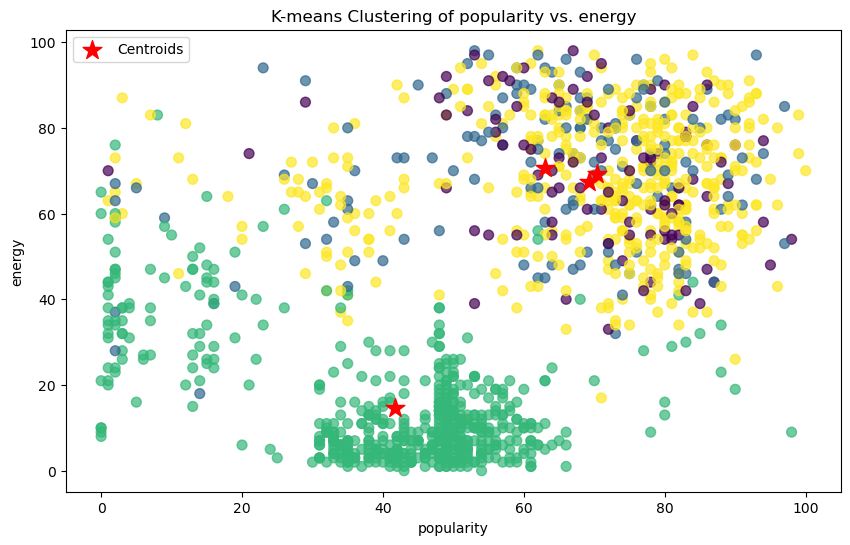

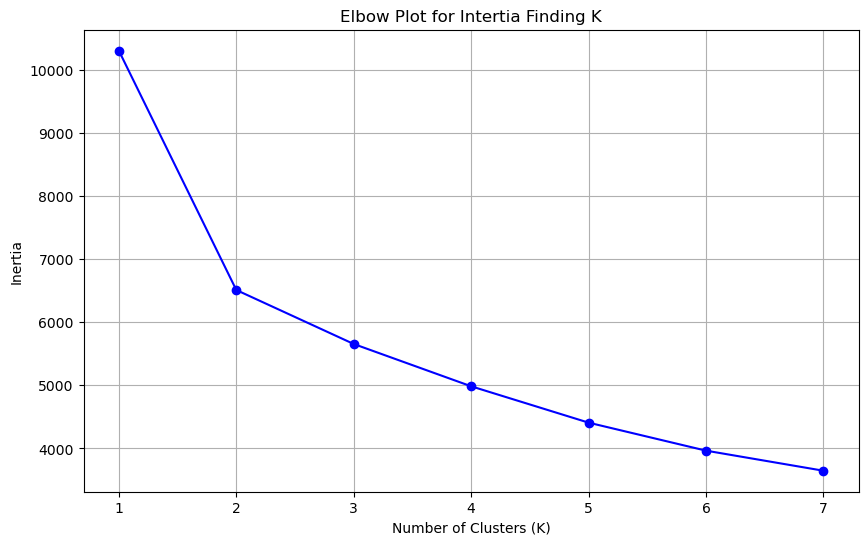

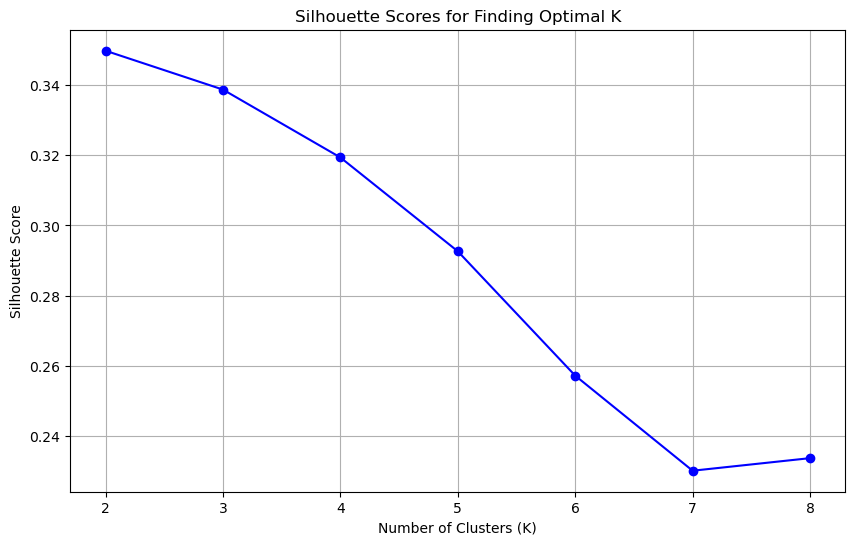

In [7]:
kmeans_clustering(spot, features = ['popularity', 'energy', 'valence', 'bpm', 'dance', 'acous', 'spch', 'live'], num_clusters = 4)
elbow_plot(spot, features = ['popularity', 'energy', 'valence', 'bpm', 'dance', 'acous', 'spch', 'live'])
silhouette_plot(spot, features = ['popularity', 'energy', 'valence', 'bpm', 'dance', 'acous', 'spch', 'live'])

Poor model performance for both intertia and silhouette scores. Both recommended number of clusters is 2 with a high intertia score and low silhouette score around 34%.

## Second run with less features to try and have more separate clusters.

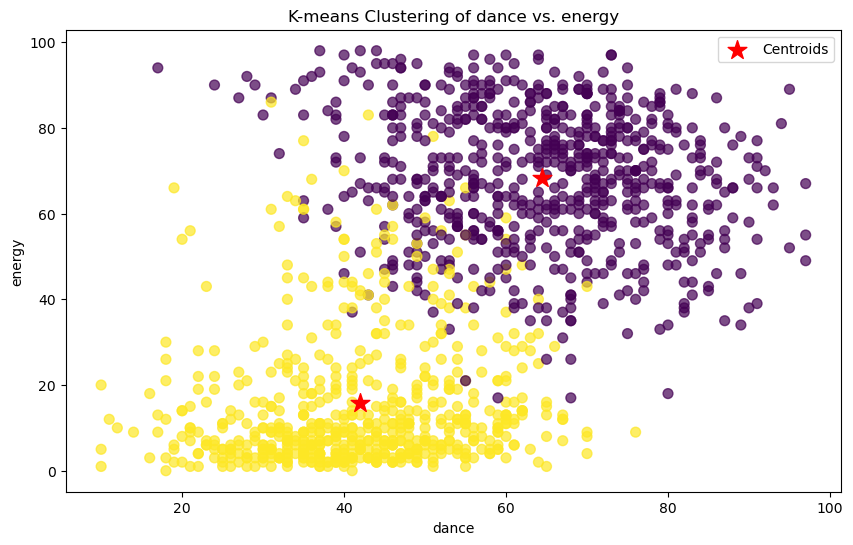

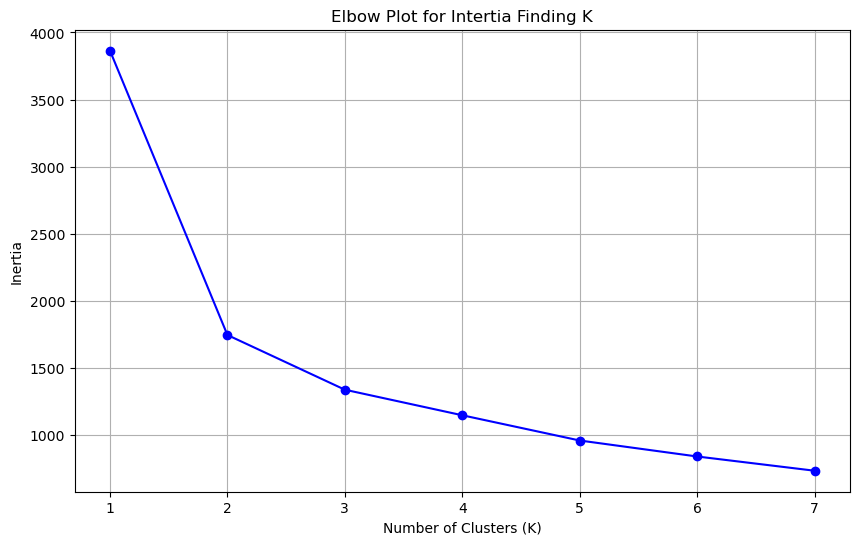

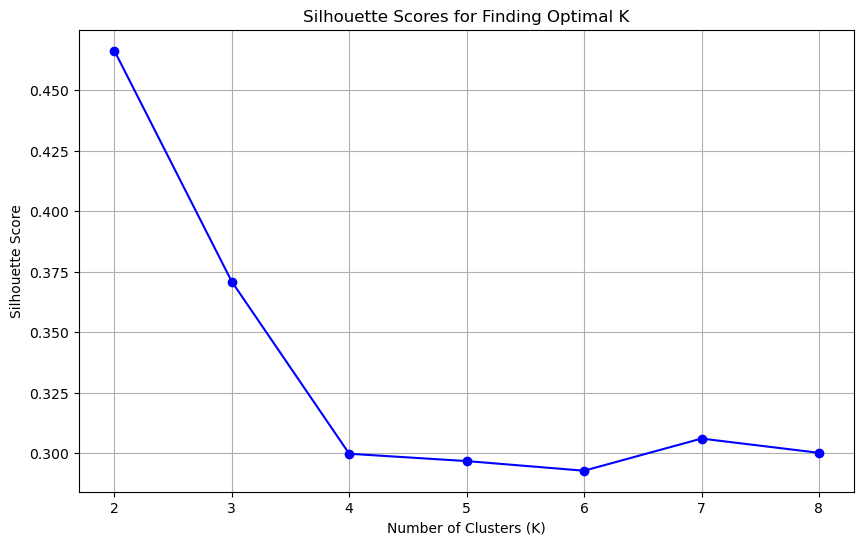

In [8]:
kmeans_clustering(spot, features = ['dance', 'energy', 'valence'], num_clusters = 2)
elbow_plot(spot, features = ['dance', 'energy', 'valence'])
silhouette_plot(spot, features = ['dance', 'energy', 'valence'])

Better performing than the last one but still stuck at recommended 2 clusters when they aren't that clear. Still high intertia score near 4000 and a silhouette score of around 45%. 

## Third times the charm, with only two features and chosen from my EDA who seemed to have the clearest clusters.

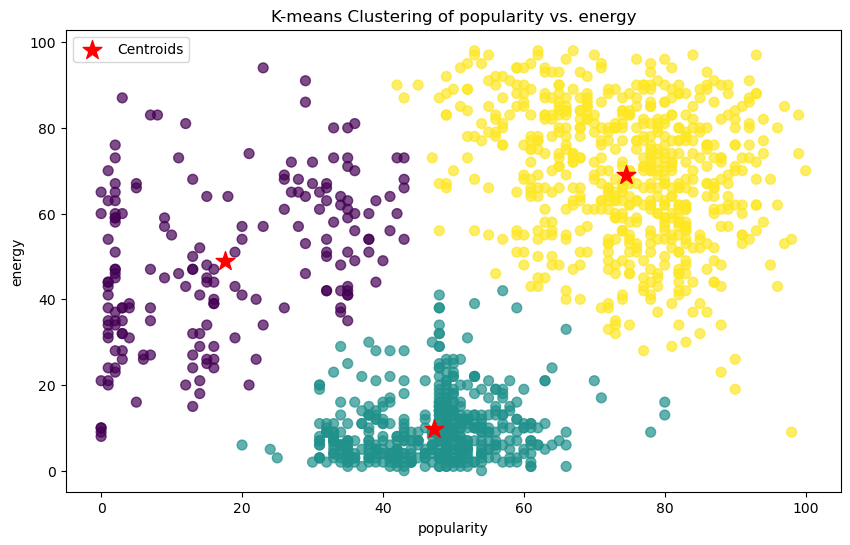

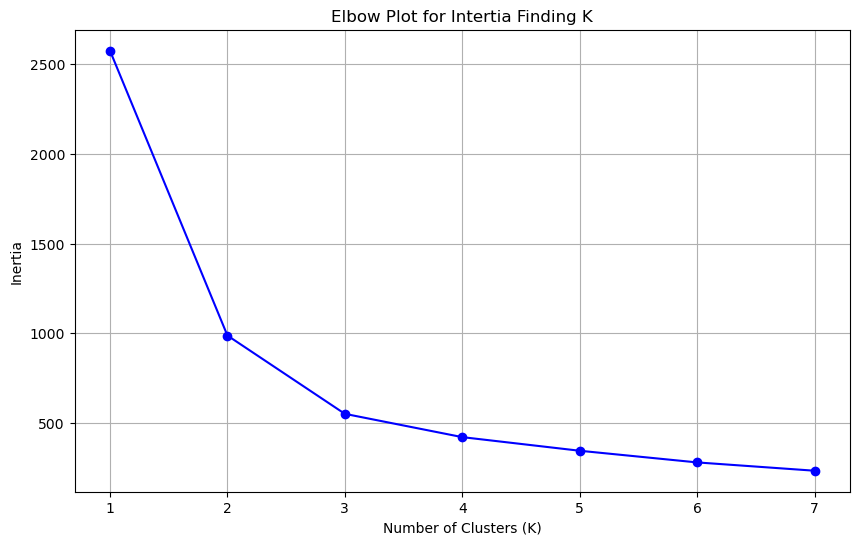

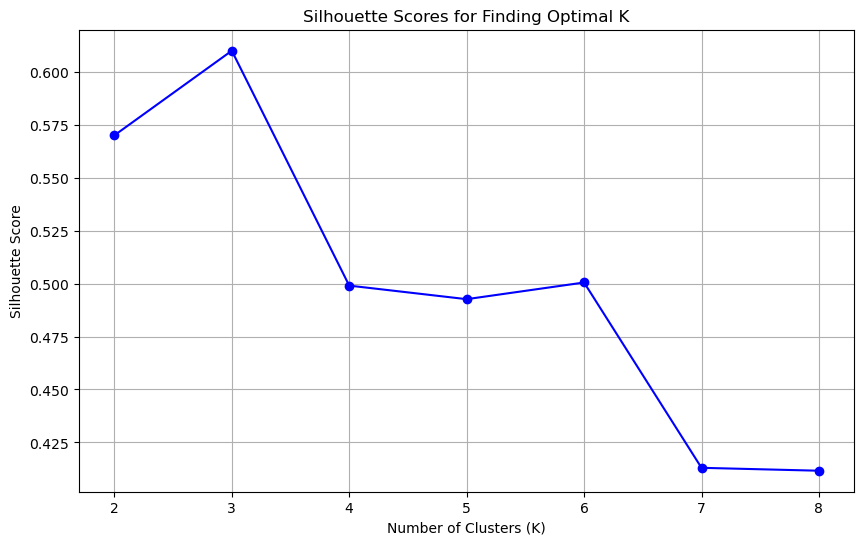

In [9]:
kmeans_clustering(spot, features = ['popularity', 'energy'], num_clusters = 3)
elbow_plot(spot, features = ['popularity', 'energy'])
silhouette_plot(spot, features = ['popularity', 'energy'])

In [10]:
X = spot[['popularity', 'energy']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters = 3, random_state = 12)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=12)

In [11]:
# Getting silhouette score to compare model performances.
silhouette_score(X_scaled, kmeans.labels_)

0.6100156228766582

In [12]:
spot['km cluster'] = kmeans.labels_
spot.head()

,song title,artist,top genre,year,added,bpm,energy,dance,dB,live,valence,dur,acous,spch,popularity,km cluster
0,Chop Suey!,System Of A Down,alternative metal,2001,1969‑12‑31,127,93,42,-4,13,29,210,0,12,86,2
1,Just Pretend,Bad Omens,american metalcore,2022,1969‑12‑31,140,83,46,-5,10,20,205,0,8,81,2
2,Monster,Skillet,alternative metal,2009,1969‑12‑31,135,96,64,-2,8,69,178,4,7,80,2
3,Popular Monster,Falling In Reverse,alternative metal,2019,1969‑12‑31,165,90,46,-4,10,36,221,1,9,78,2
4,Watch The World Burn,Falling In Reverse,alternative metal,2023,1969‑12‑31,162,78,40,-6,21,35,204,1,13,78,2


In [13]:
# Saving the new cluster column to be used for the recommender.
final = 'final.csv'
#spot.to_csv(final, index = False)

Best performing model by far out of the bunch with an inertia score that is still high at around 2500, but the silhouette score is 61%. The interesting thing is that the intertia score still seems to be recommending 2 clusters while the silhouette begs to differ recommending 3.

## DBSCAN

Since we have found a mix of features that provide us clearer clusters lets try a DBSCAN to see if we can get a better silhouette score.

## Function to run DBSCAN to iterate quickly.

In [14]:
def dbscan_clustering(spot, features, eps = 0.2, min_samples=1):
    # Set ability to choose features.
    X = spot[features]

    # Scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # DBSCAN model.
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit.
    dbscan.fit(X_scaled)

    # Cluster labels.
    labels = dbscan.labels_

    # Create a scatter plot.
    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

    # Graph labels.
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f'DBSCAN Clustering of {features[0]} vs. {features[1]}')
    plt.show();

## First iteration.

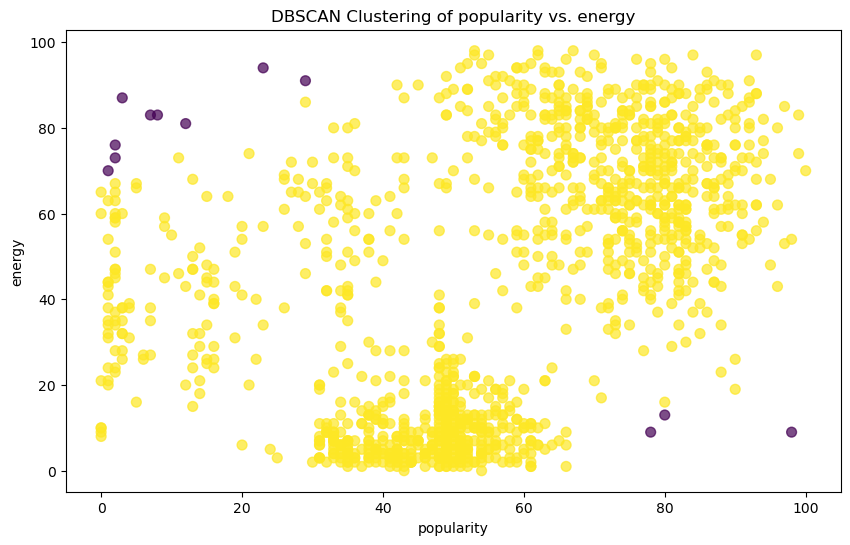

In [15]:
dbscan_clustering(spot, features = ['popularity', 'energy'], eps = .5, min_samples = 30)

Looks like epsilon is too high with number of minimum samples. So lets decrease the number of distance between the samples and number of samples from the core point.

## Second iteration with lower samples and epsilon.

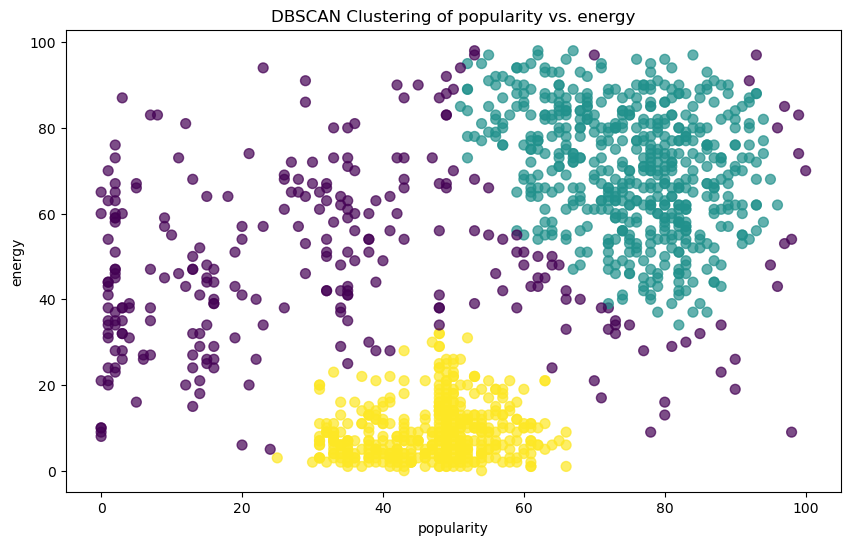

In [16]:
dbscan_clustering(spot, features = ['popularity', 'energy'], eps = .25, min_samples = 25)

Looks like this provided us with the 3 clusters that scored high on the K-means. However the purple cluster is bleeding into the green so lets try and increase epsilon to clear those and decrease the minimum samples.

## Third iteration with higher epsilon and lower samples.

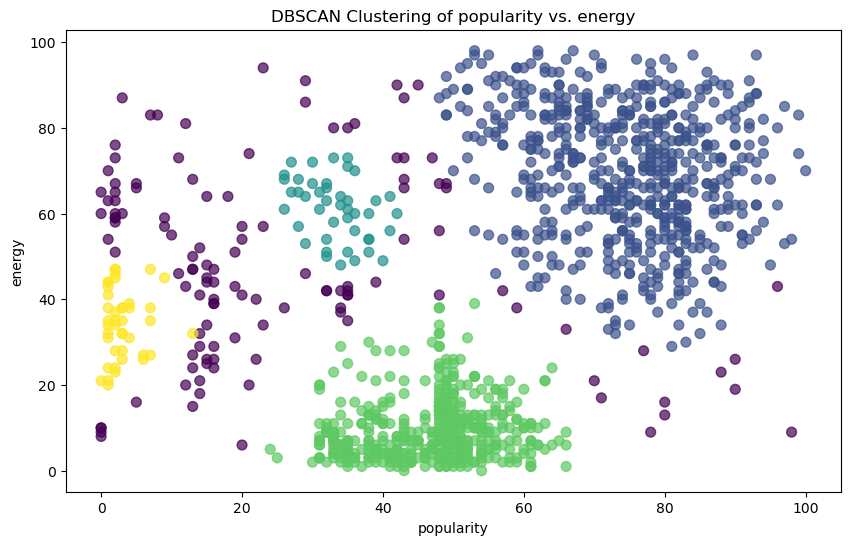

In [17]:
dbscan_clustering(spot, features = ['popularity', 'energy'], eps = .3, min_samples = 22)

Seemed to clear the bleeding of the previous purple cluster but created a few more in the process that are speckled about. Lets redo what we just did increasing the epsilon and decreasing the minimum samples.

## Fourth iteration with higher epsilon and less minimum samples.

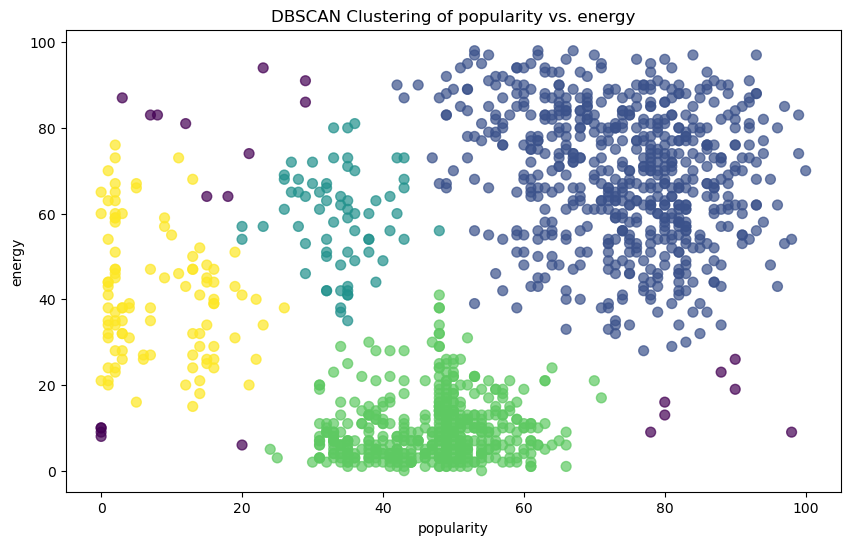

In [18]:
dbscan_clustering(spot, features = ['popularity', 'energy'], eps = .36, min_samples = 19)

Looking like we are finding a sweetspot to where our purple dots are now just going to be outliers. Let us run one more model to see if we can take out more of the purple one dots by increasing our epsilon and minimum samples by small amount.

## Fifth iteration and success.

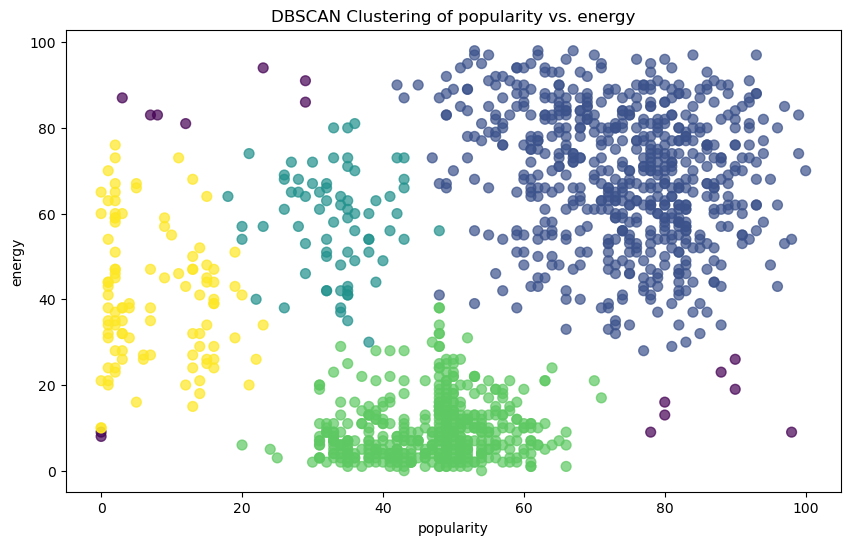

In [19]:
dbscan_clustering(spot, features = ['popularity', 'energy'], eps = .39, min_samples = 20)

In [20]:
X = spot[['popularity', 'energy']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps = .39, min_samples = 20)
dbscan.fit(X_scaled)

DBSCAN(eps=0.39, min_samples=20)

In [21]:
# Getting silhouette score to compare model performances.
silhouette_score(X_scaled, dbscan.labels_)

0.5563656694922839

4 clusters and a silhouette score of 55.6%. This isn't performing as well as the K-means model sadly probably because the clusters are not as clearly separated as DBSCAN's prefer.

## Spectral Clustering

After running the previous two models we can see that the k-means model performed better. Both of the previous models used the distance between points as there geometric metric. Now that we know 3 clusters is the sweetspot, lets try a model who focuses on graph distance and small numbers of clusters.

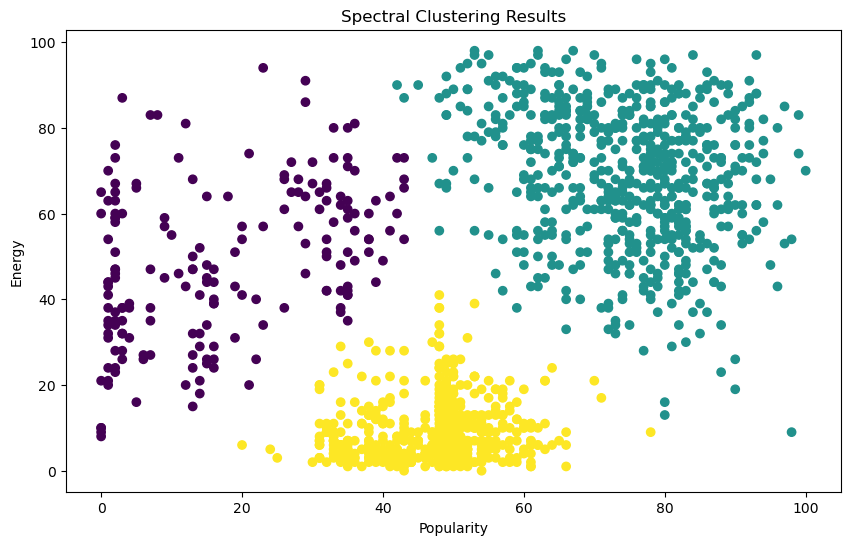

In [22]:
# Create the model.
spectral_clustering = SpectralClustering(n_clusters = 3, affinity='nearest_neighbors', random_state=12)

X = spot[['popularity', 'energy']]

# Scale.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit.
labels = spectral_clustering.fit_predict(X_scaled)

# Graph labels.
plt.figure(figsize=(10, 6))
plt.scatter(X['popularity'], X['energy'], c=labels, cmap='viridis')
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.title('Spectral Clustering Results')
plt.show();

In [23]:
# Getting silhouette score to compare model performances.
silhouette_score(X_scaled, spectral_clustering.labels_)

0.6096249327956542

We have ALMOST an exact tie.

+ K-means had a silhouette score of 0.6100156228766582.
+ Spectral had a silhouette score of 0.6096249327956542.

If you are round though we do have a tie at 61%.

## Conclusion and Recommendations

Features played a major role in how the models ended up working. As we saw in the beginning by adding multiple features into the models we had no clearly visible clusters. By cutting back the features till we had 2 we could then see some clear clusters in the graph. The clusters seemed to be 3 clusters to my eyes but based off intertia they were still 2 and silhouette scores for k-means they were 3. The 3 clusters also had the highest silhouette scores at 61% so we stuck with those features for the rest of the models.

DBSCAN relies off having more clearly separated clusters but since we had better ones I decided to see if it could score higher than the K-means model. It did not. At 4 clusters it gave me its highest scores at 56% which paled in comparison to the K-means models performance. Causing me to go for one more model to see if I could score a better score than the K-means model.

The spectral clustering model was my last model to beat K-means by using a model that focused on graph distance as compared to distances between points. Rounded we actually ended up with the same silhouette score of 61% so while the model was more effective than the DBSCAN it could not dethrone K-means completely.

I would have to gather different data to ensure more separation within the clusters so I can have better performing models. It would be beneficial that within my data I would keep the playlists to specific moods and beats per minute to create distinct clusters. By nitpicking songs that were popular adhering to the moods and beats per minute I am certain I would have clearer clusters.